In [1]:
# Business understanding
# Data understanding
# Data preparation
# Modeling
# Evaluation
# /49864_274957_bundle_archive/googleplaystore.csv

In [2]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

/Users/jacques/opt/anaconda3/envs/data-sci/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('49864_274957_bundle_archive/googleplaystore.csv')

# Inspection 👀

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


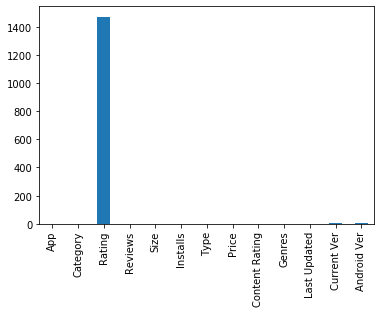

In [6]:
df.isna().sum().plot.bar();

# Springcleaning 🧹

In [7]:
def clean_size(string):
    
    '''
    func standarises storage units and excludes 'Varies with device'
    INPUT: string - storage units include M, k and 'Varies with device'
    OUTPUT: float
    
    '''
    
    if string == 'Varies with device':
        num = np.nan
    elif string[-1] == 'M':
        num = float(string.split('M')[0])
    elif string[-1] == 'k':
        num = float(string.split('k')[0]) * 0.001
    else:
        num = np.nan
    return num

In [8]:
def clean_installs(string):
    
    '''
    func removes '+' symbol from string objects
    
    '''
    
    if len(string) > 0:
        string = string[:-1].replace(',', '')
        return (string)
    else:
        pass

In [9]:
def clean_price(string):
    
    '''
    func removes '$' symbol from string objects

    '''
    try:
        return float(string.replace('$', ''))
    except ValueError:
        return np.nan

In [10]:
def clean_date(string):
    
    '''
    func converts string object to date
    INPUT: string with strptime format '%B %d %Y'
    OUTPUT: datetime object
    
    '''
    try:
        string = string.replace(',','')
        date_time_str = string
        date_time_obj = dt.strptime(date_time_str, '%B %d %Y')
        return date_time_obj
    except ValueError:
        return np.nan

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [13]:
df['Size'] = df['Size'].apply(clean_size)

In [14]:
df['Installs'] = df['Installs'].apply(clean_installs)

In [15]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [16]:
df['Price'] = df['Price'].apply(clean_price)

In [17]:
df['Last Updated'] = df['Last Updated'].apply(clean_date)

In [18]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [19]:
df['Rating'] = pd.to_numeric(df['Rating'])

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.reset_index(inplace=True, drop=True)

# Explore 🧭

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [23]:
df['Last Updated'].sort_values(ascending=True).head()

5272   2010-05-21
5235   2011-01-30
7358   2011-03-16
5978   2011-04-11
5750   2011-04-16
Name: Last Updated, dtype: datetime64[ns]

In [24]:
df['Last Updated'].sort_values(ascending=True).tail()

7053   2018-08-07
7443   2018-08-08
7293   2018-08-08
7671   2018-08-08
7639   2018-08-08
Name: Last Updated, dtype: datetime64[ns]

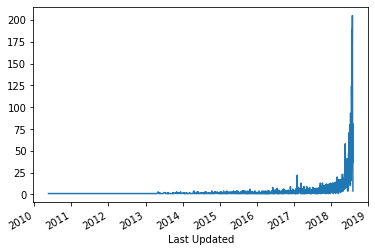

In [25]:
df['Last Updated'].groupby(df['Last Updated']).count().plot();

In [26]:
df['Last Updated Year'] = df['Last Updated'].dt.year

In [27]:
df['Last Updated Year'].value_counts()

2018    5058
2017    1384
2016     600
2015     374
2014     183
2013      88
2012      20
2011      15
2010       1
Name: Last Updated Year, dtype: int64

In [28]:
month_count = df['Last Updated'].dt.month.value_counts().reset_index().sort_values('index')

In [29]:
month_count.columns = ['month_index', 'Last Updated']

In [30]:
month_count = month_count.reset_index()

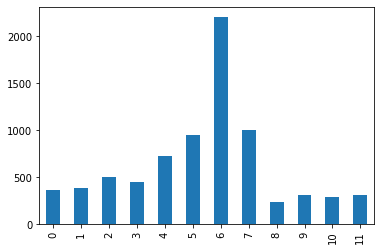

In [31]:
month_count['Last Updated'].plot.bar();

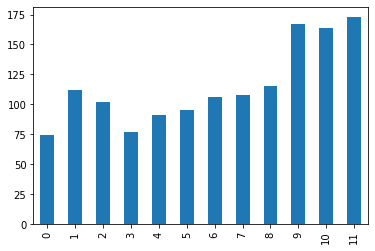

In [32]:
df[df['Last Updated Year'] == 2017]['Last Updated']\
.dt.month.value_counts().reset_index().sort_values('index').reset_index()['Last Updated'].plot.bar();

In [33]:
# Most app last updates occured in July followed by August and June.
# Although there's seems to be a strong bias perhaps from when the dataset was scraped
# If we consider the year 2017 the monthly distribution is skewed towards the left with most updates
# having occured within the last three months of the year

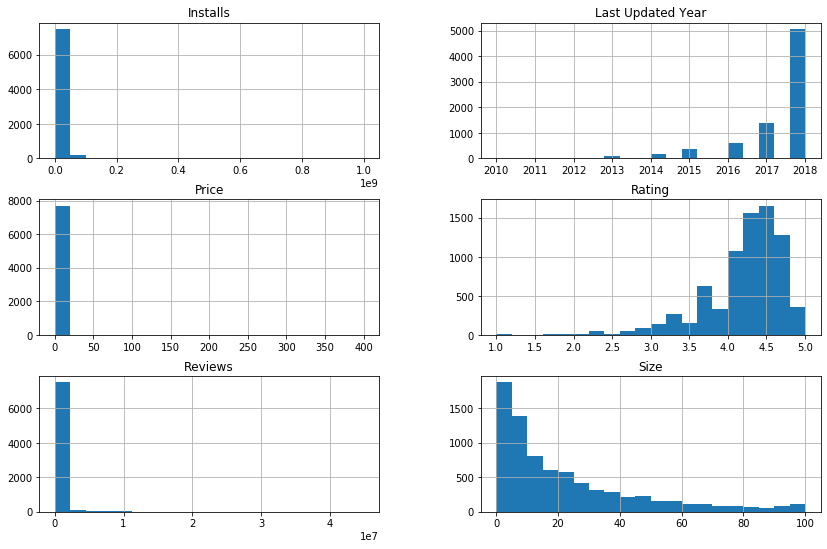

In [34]:
df.hist(bins=20);

fig = plt.gcf()
fig.set_size_inches(14, 9)

In [35]:
# When looking at our data distribution of our non-categorical columns, most columns are right skewed
# with a long tail extending towards the right. In particular, Installs, Price and Reviews seem to have a couple
# extreme outliers

In [36]:
# Inspecting the price of Google Playstore apps, most - as expected - are free.

In [37]:
# The most expensive apps are variations of the "I Am Rich" app which is priced at the store's maximum

In [38]:
df.sort_values('Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
3045,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018
2911,most expensive app (H),FAMILY,4.3,6.0,1.500,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,2018
3795,I am Rich Plus,FAMILY,4.0,856.0,8.700,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018
3792,I am rich,LIFESTYLE,3.8,3547.0,1.800,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,2018
3797,I Am Rich Premium,FINANCE,4.1,1867.0,4.700,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017
3799,I am Rich!,FINANCE,3.8,93.0,22.000,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,2017
3800,I am rich(premium),FINANCE,3.5,472.0,0.965,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,2017
3041,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018
3803,I Am Rich Pro,FAMILY,4.4,201.0,2.700,5000.0,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017
3805,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700,1000.0,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017


In [39]:
# How many apps actually contain the word rich

In [40]:
rich_df = df[(df['App'].str.contains('Rich', case=False)) & (df['Type'] == 'Paid')]

In [41]:
rich_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1564 to 3814
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                18 non-null     object        
 1   Category           18 non-null     object        
 2   Rating             18 non-null     float64       
 3   Reviews            18 non-null     float64       
 4   Size               18 non-null     float64       
 5   Installs           18 non-null     float64       
 6   Type               18 non-null     object        
 7   Price              18 non-null     float64       
 8   Content Rating     18 non-null     object        
 9   Genres             18 non-null     object        
 10  Last Updated       18 non-null     datetime64[ns]
 11  Current Ver        18 non-null     object        
 12  Android Ver        18 non-null     object        
 13  Last Updated Year  18 non-null     int64         
dtypes: date

In [42]:
rich_df.sort_values('Installs', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
3792,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,2018
3797,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017
3045,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018
3795,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018
3796,I am rich VIP,LIFESTYLE,3.8,411.0,2.6,10000.0,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,2018


In [43]:
# The app with the most installs is "I am rich". With over 100,000 people who have paid 399 USD, the developer
# made at least 39,900,000 USD

In [44]:
# Interestingly, the app has a Rating of 3.8, which is only slightly below the average Rating.
# It's also the smallest app of the 'I am rich' app category

In [45]:
# The Rating column is the only column left skewed

In [46]:
# Let's see which columns have the strongest correlations with app ratings

In [47]:
corr = df.corr().sort_values('Rating', ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,Rating,Reviews,Size,Installs,Price,Last Updated Year
Rating,1.000000,0.079819,0.083640,0.052693,-0.021320,0.128942
Last Updated Year,0.128942,0.078597,0.221164,0.079138,0.001096,1.000000
Size,0.083640,0.240382,1.000000,0.162707,-0.026272,0.221164
Reviews,0.079819,1.000000,0.240382,0.626187,-0.010184,0.078597
Installs,0.052693,0.626187,0.162707,1.000000,-0.010852,0.079138
Price,-0.021320,-0.010184,-0.026272,-0.010852,1.000000,0.001096


In [48]:
# Size has the biggest correlation with our Rating column
# We can see the correlation in our data distribution as well
# with both columns sharing similar distribution shapes

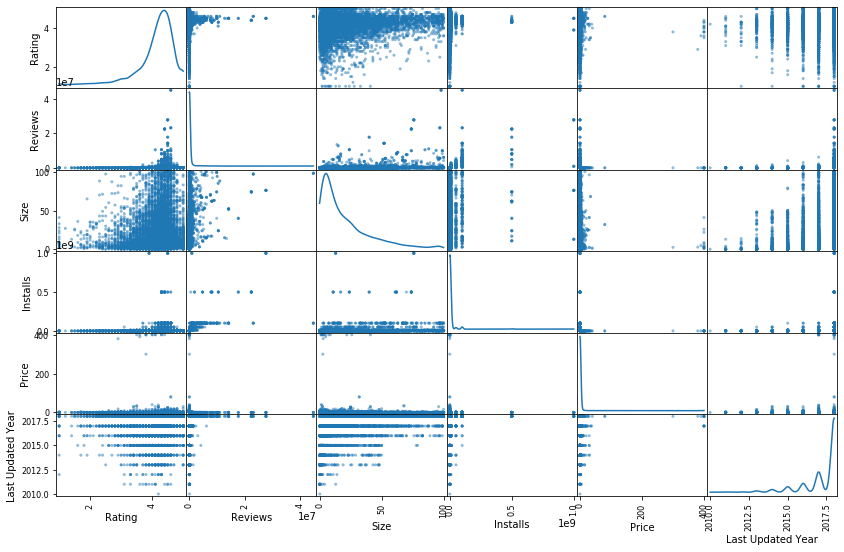

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.5, figsize=(14, 9), diagonal='kde');

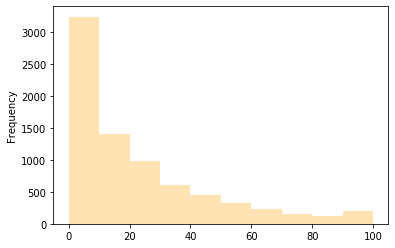

In [50]:
df['Size'].plot.hist(alpha=0.3, color='orange');

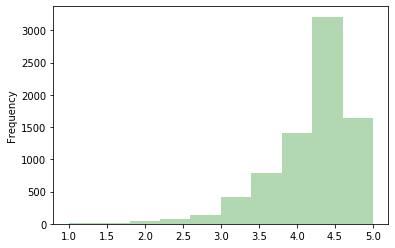

In [63]:
df['Rating'].plot.hist(alpha=0.3, color='green');

<Figure size 720x720 with 0 Axes>

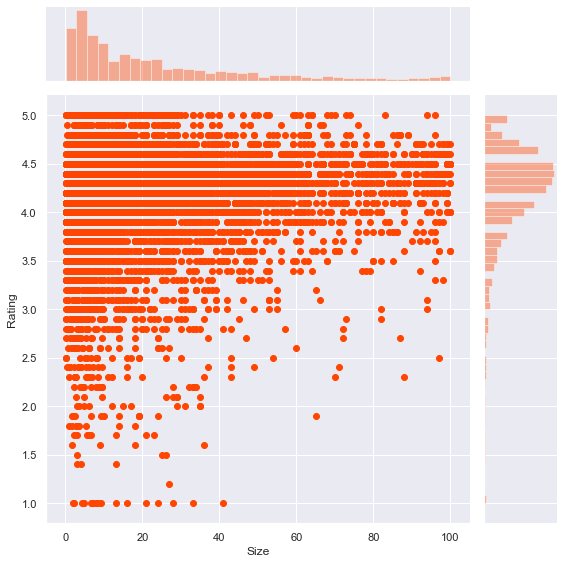

In [75]:
plt.figure(figsize = (10,10))
sns.jointplot(x="Size", y="Rating",color = 'orangered', data=df, height = 8);

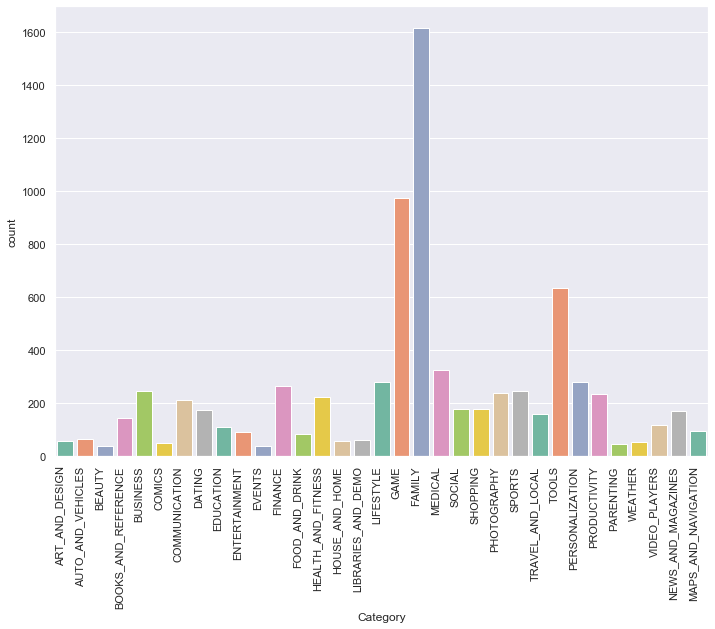

In [76]:
g = sns.countplot(x="Category",data=df, palette="Set2")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");

In [104]:
df['Rating'].groupby(df['Category']).describe().style\
.hide_index()\
.bar(color='#FFA07A', subset=['count'], align='zero')\
.bar(color='#aff587', subset=['25%'], align='zero')

count,mean,std,min,25%,50%,75%,max
58.000000,4.381034,0.334799,3.400000,4.125000,4.400000,4.700000,5.000000
63.000000,4.147619,0.565359,2.100000,3.900000,4.200000,4.500000,4.900000
37.000000,4.291892,0.370719,3.100000,4.000000,4.300000,4.600000,4.900000
144.000000,4.320139,0.457812,2.700000,4.100000,4.400000,4.625000,5.000000
246.000000,4.119919,0.662686,1.000000,3.825000,4.300000,4.500000,5.000000
49.000000,4.130612,0.574530,2.800000,3.700000,4.400000,4.600000,5.000000
211.000000,4.102844,0.501798,1.000000,3.900000,4.200000,4.400000,5.000000
173.000000,3.957803,0.666132,1.000000,3.600000,4.100000,4.400000,5.000000
110.000000,4.387273,0.260595,3.500000,4.225000,4.400000,4.600000,4.900000
90.000000,4.146667,0.284901,3.000000,4.000000,4.200000,4.300000,4.700000


In [53]:
from sklearn.model_selection import train_test_split

def split_clean_data(df, y_col, drop_cols = None):
    
    '''
    INPUT
    df - pandas dataframe
    y_col - pandas series name (string) to predict
    drop_cols - list of pandas series names (strings) to drop and exclude (optional)
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    '''
    
    # Drop rows with missing salary values
    df = df.dropna(subset=[y_col], axis=0)
    y = df[y_col]
    
    #Drop respondent and expected salary columns
    if drop_cols is not None:
        df.drop(drop_cols, axis=1, inplace=True)
    else:
        pass
    
    df.drop(y_col, axis=1, inplace=True)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    
    return X, y

#Use the function to create X and y
X, y = split_clean_data(df, y_col='Rating')

# use case example - create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Size has the biggest correlation with our Rating column
# We can see the correlation in our data distribution as well
# with both columns sharing similar distribution shapes

In [56]:
# import ppscore as pps

# pps.matrix(df)

In [57]:
# Looking at our correlation table, the 

In [58]:
# top questions:
# what features determine app ratings
# which categories are genres are the most popular
# what do all the expensive apps have in common
# free vs paid